___
# K Means Clustering Project 

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

This dataset does contain the labels that we use for evaluation, however, this may not be provided in a real world context therefore the evaluation at the end will not be necessary. But since we have the labels, we can use them to evaluate the model.
___

## The Data

The data frame contains 777 observations on these 18 variables:
* **Private**: Yes or no indicating private or public university
* **Apps**: Number of applications received
* **Accept**: Number of applications accepted
* **Enroll**: Number of new students enrolled
* **Top10perc**: Percent of new students from top 10% of H.S. class
* **Top25perc**: Percent of new students from top 25% of H.S. class
* **F.Undergrad**: Number of fulltime undergraduates
* **P.Undergrad**: Number of parttime undergraduates
* **Outstate**: Out-of-state tuition
* **Room.Board**: Room and board costs
* **Books**: Estimated book costs
* **Personal**: Estimated personal spending
* **PhD**: Percent of faculty with Ph.D.’s
* **Terminal**: Percent of faculty with terminal degree
* **S.F.Ratio**: Student/faculty ratio
* **perc.alumni**: Percent of alumni who donate
* **Expend**: Instructional expenditure per student
* **Grad.Rate**: Graduation rate

___
### Setting up Libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Getting the Data:

In [2]:
college=pd.read_csv('College_Data')

In [3]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [5]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.5+ KB


___
## Exploratory Analysis

It's time to create some data visualizations to see if we can gain any insights!

In [6]:
sns.set_style('whitegrid')

C:\Users\Tyler. T\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


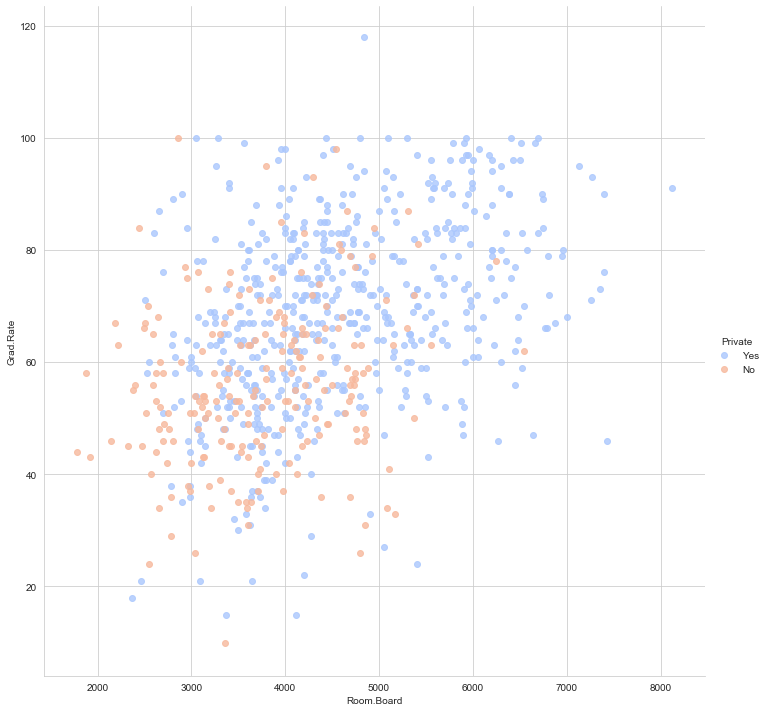

In [7]:
sns.lmplot(data=college, x='Room.Board', y='Grad.Rate', hue='Private', palette='coolwarm', size=10, aspect=1, fit_reg=False)

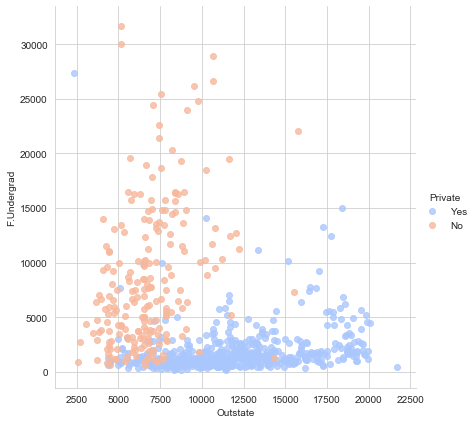

In [8]:
sns.lmplot(data=college, x='Outstate', y='F.Undergrad', hue='Private', palette='coolwarm', size=6, aspect=1, fit_reg=False)

Let's try making histograms for analysis. Let's compare out of state tuition with whether a school is private or public.

In [9]:
sns.set_style('darkgrid')

C:\Users\Tyler. T\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


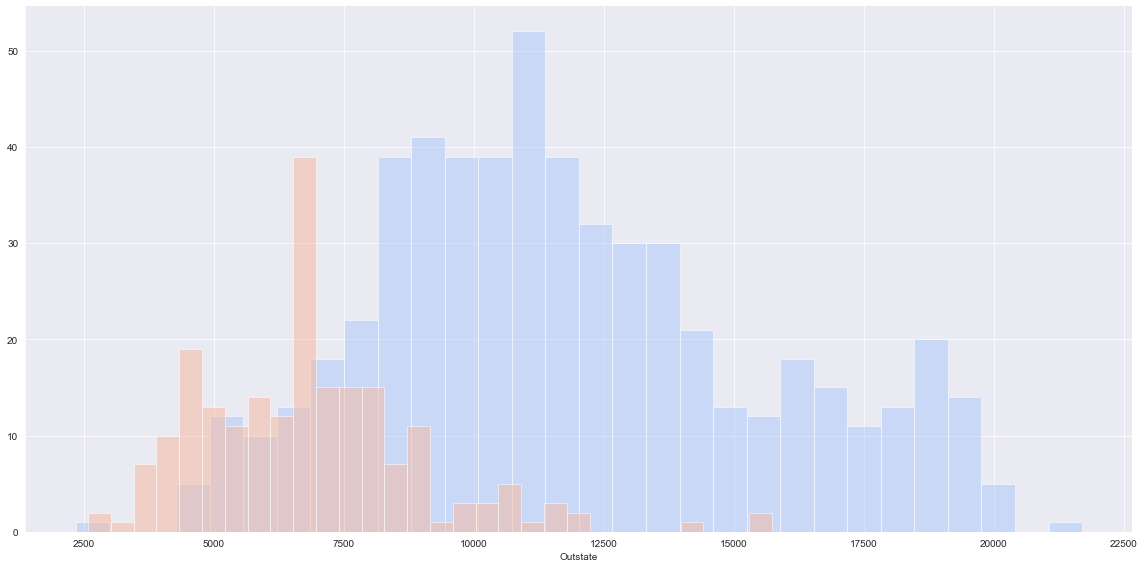

In [10]:
g = sns.FacetGrid(data=college, hue='Private', palette='coolwarm', size=8, aspect=2)
g = g.map(plt.hist, 'Outstate', bins=30, alpha=0.5)

Now let's try Graduation Rate

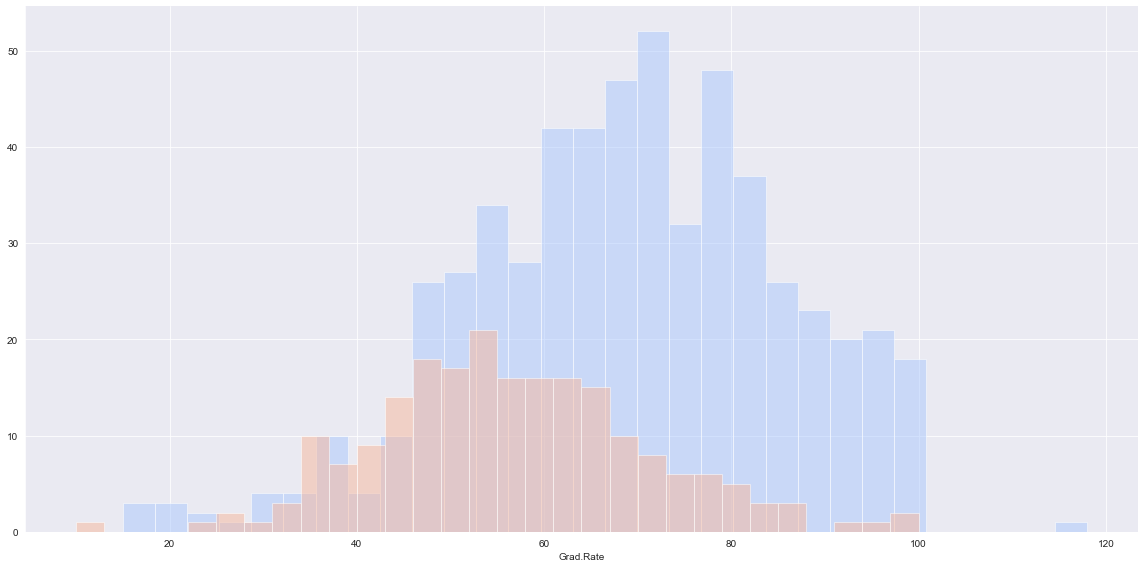

In [11]:
g = sns.FacetGrid(data=college, hue='Private', palette='coolwarm', size=8, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=30, alpha=0.5)

**interesting, it seems we have an error with a school having a higher graduation rate. Before going any further, we should fix this error since the graduation rate cannot exceed 100%**

In [12]:
college[college['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [15]:
college.loc[95, 'Grad.Rate']=100

In [16]:
college[college['Grad.Rate']>100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


C:\Users\Tyler. T\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


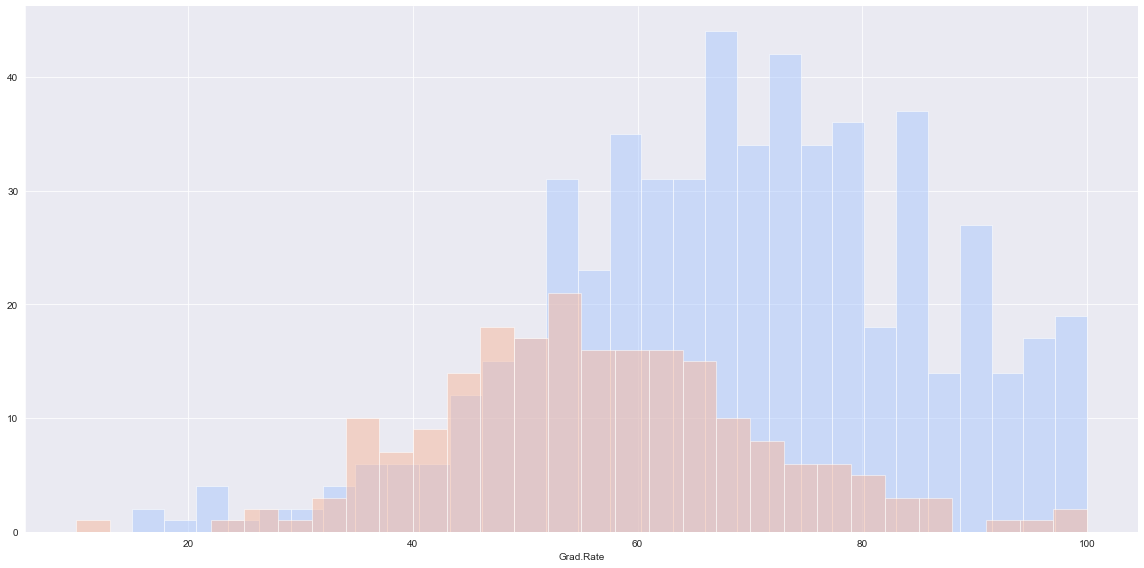

In [47]:
g = sns.FacetGrid(data=college, hue='Private', palette='coolwarm', size=8, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=30, alpha=0.5)

___
## K Means Cluster

Now that the data has been fixed we can move onto creating the K Means Clusters

In [17]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [18]:
kmeans = KMeans(n_clusters=2)

In [31]:
list(college.columns)

['Unnamed: 0',
 'Private',
 'Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

In [29]:
kmeans.fit(college.drop(['Private', 'Unnamed: 0'],axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01]])

___
## Evaluation

Since this is a quick project, our label is provided as the 'Private' column to compare for. However, in a real world setting, we would not have the luxury of having a label. But since we have it, we can use it to compare the results.

In [32]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [38]:
college['Cluster'] = college['Private'].apply(converter)

In [39]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(confusion_matrix(college['Cluster'],kmeans.labels_))
print('\n\n')
print(classification_report(college['Cluster'],kmeans.labels_))

[[ 74 138]
 [ 34 531]]



              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



___
## Conclusion
Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups!
Now that we understand how K Means Clustering works, we can apply this to unlabeled data.